# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Problem definition

Predict the price of used cars based on their characteristics.

The goal is to utilize regression models to identify significant predictors of car prices and provide actionable ingights to a used cat dealership on which vehicle features consumers value the most.



In transforming the business understanding of identifying key drivers for used car prices into a data problem definition, we can approach it as follows:

**Data Problem Definition:**

The task is to construct a predictive analytics model that quantifies the relationship between various vehicle attributes and their listing prices. This involves identifying and quantifying correlations and causations between the dependent variable (used car prices) and independent variables (attributes such as year of manufacture, make, model, mileage, condition, and other relevant features). The objective is to employ statistical analysis and machine learning techniques to develop a robust regression model that can predict car prices based on these attributes. The model’s effectiveness will be evaluated based on its accuracy, as measured by metrics such as Root Mean Squared Error (RMSE) and R-squared (R²). The ultimate goal is to leverage this model to provide actionable insights that can guide inventory decisions at a used car dealership by highlighting features that significantly impact vehicle valuation in the market.

#### Notes



## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Loading nessary modules for data understanding

In [241]:
import re
from joblib import Parallel, delayed
from time import time


import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures,
    RobustScaler,
    QuantileTransformer,
    PowerTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
cars = pd.read_csv(filepath_or_buffer='data/vehicles.csv')

In [4]:
cars.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
cars.describe()

,id,price,year,odometer
count,426880.000,426880.000,425675.000,422480.000
mean,7311486634.224,75199.033,2011.235,98043.331
std,4473170.413,12182282.174,9.452,213881.501
min,7207408119.000,0.000,1900.000,0.000
25%,7308143339.250,5900.000,2008.000,37704.000
50%,7312620821.000,13950.000,2013.000,85548.000
75%,7315253543.500,26485.750,2017.000,133542.500
max,7317101084.000,3736928711.000,2022.000,10000000.000


In [7]:
cars.duplicated().sum()

0

In [8]:
cars.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
missing_percentage = cars.isnull().sum() / cars.shape[0] * 100
missing_percentage[missing_percentage > 0]

year            0.282
manufacturer    4.134
model           1.236
condition      40.785
cylinders      41.622
fuel            0.706
odometer        1.031
title_status    1.931
transmission    0.599
VIN            37.725
drive          30.586
size           71.767
type           21.753
paint_color    30.501
dtype: float64

In [10]:
unique_objects = {}
for column in cars.columns:
    if cars[column].dtype == 'object':
        unique_objects[column] = len(cars[column].unique())
unique_objects

{'region': 404,
 'manufacturer': 43,
 'model': 29650,
 'condition': 7,
 'cylinders': 9,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'VIN': 118247,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'state': 51}

* Better to drop `ID`, `VIN` columns which are not very helpful.
* Drop `mode` wich has high cardinality.

In [11]:
unique_objects = {}
for column in cars.columns:
    if cars[column].dtype == 'object' and column not in ['region', 'manufacturer', 'model', 'VIN', 'state']:
        unique_objects[column] = cars[column].unique()
unique_objects


{'condition': array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 'cylinders': array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
        'other', '3 cylinders', '10 cylinders', '12 cylinders'],
       dtype=object),
 'fuel': array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
        'parts only'], dtype=object),
 'transmission': array([nan, 'other', 'automatic', 'manual'], dtype=object),
 'drive': array([nan, 'rwd', '4wd', 'fwd'], dtype=object),
 'size': array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
       dtype=object),
 'type': array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
        'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
        'wagon'], dtype=object),
 'paint_color': array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
        'yellow', 

In [12]:
cars.loc[cars['manufacturer'].isnull(), 'model'].value_counts()


model
Scion iM Hatchback 4D             640
smart fortwo Passion Hatchback    168
Genesis G80 3.8 Sedan 4D          163
Freightliner Cascadia             153
International 4300                148
                                 ... 
bentley continental gtc             1
BENTLEY FLYING SPUR                 1
NISSA SENTRA                        1
1992 International 4900             1
Paige Glenbrook Touring             1
Name: count, Length: 6044, dtype: int64

In [13]:
# Remove model row.
# Remove rows with models which contains Freightliner, International 4300, WORKHORSE  as they are trucks not cars using varaiable remove_models_containing.
# Create a map for models that contain model to manufacturer map using var manufacturer_map. Here for any null manufacturer, if model contains a key of manufacturer_map, then mainmanufacturer is manufacturer_map[key]
remove_models_containing = ['Freightliner', 'International', 'WORKHORSE', 'Hino', 'peterbilt', 'BLUE BIRD', 'sterling',
                            'Kenworth']
manufacturer_map = {
  "scion": "scion",
  "smart fortwo": "smart fortwo",
  "genesis": "genesis",
  "hummer": "gmc",
  "ierra 1500": "gmc", # sierra 1500
  "oldsmobile": "gmc",
  "maserati": "maserati",
  "lamborghini": "lamborghini",
  "mclaren": "mclaren",
  "isuzu": "isuzu",
  "saab": "saab",
  "f-150": "ford",
  "f-250": "ford",
  "altima": "nissan",
  "tacoma": "toyota",
  "suzuki":   "suzuki",
  "subaru": "subaru",
  "Suburu": "subaru",
  "rolls royce": "rolls-royce",
  "Bentley": "bentley",
  "lotus": "lotus",
  "volvo": "volvo",
  "gm": "gmc",
  "hyndai": "hyundai",
  "hundai": "hyundai",
  "SANTA FE": "hyundai",
  "hiunday": "hyundai",
  "chryler": "chrysler",
  "corvette": "chevrolet",
  "chevrolet": "chevrolet",
  "chevorlet": "chevrolet",
  "cheverolet": "chevrolet",
  "Chevy": "chevrolet",
  "toyota": "toyota",
  "TOYOYTA": "toyota",
  "infinite": "infiniti",
  "infiniti": "infiniti",
  "g35": "infiniti",
  "g37": "infiniti",
  "ford": "ford",
  "acura": "acura",
  "acrura": "acura",
  "accura": "acura",
  "jeep": "jeep",
  "Wrangler": "jeep",
  "honda": "honda",
  "mazda": "mazda",
  "cx-5": "mazda",
  "chysler": "chrysler",
  "chrystler": "chrysler",
  "dodge": "dodge",
  "neon": "dodge",
  "chrysler": "chrysler",
  "mercedes": "mercedes-benz",
  "benz": "mercedes-benz",
  "bmw": "bmw",
  "Wolkswagen": "volkswagen",
  "volkswagen": "volkswagen",
  "Volkswagon": "volkswagen",
  "jetta": "volkswagen",
  "cadaillac": "cadillac",
  "caddilac": "cadillac",
  "cadillac": "cadillac",
  "Cadilac": "cadillac",
  "ram 1500": "dodge",
  "mustang": "ford",
  "prius": "toyota",
  "accord": "honda",
  "civic": "honda",
  "lexus": "lexus",
  "pontiac": "pontiac",
  "camry": "toyota",
  "sienna": "toyota",
  "cr-v": "honda",
  "rav4": "toyota",
  "tundra": "toyota",
  "silverado": "chevrolet",
  "colorado": "chevrolet",
  " wrangler": "jeep",
  "cherokee": "jeep",
  "grand cherokee": "jeep",
  "durango": "dodge",
  "charger": "dodge",
  "grand caravan": "dodge",
  "challenger": "dodge",
  "malibu": "chevrolet",
  "impala": "chevrolet",
  "escape": "ford",
  "edge": "ford",
  "explorer": "ford",
  "fusion": "ford",
  "pilot": "honda",
  "odyssey": "honda"
}


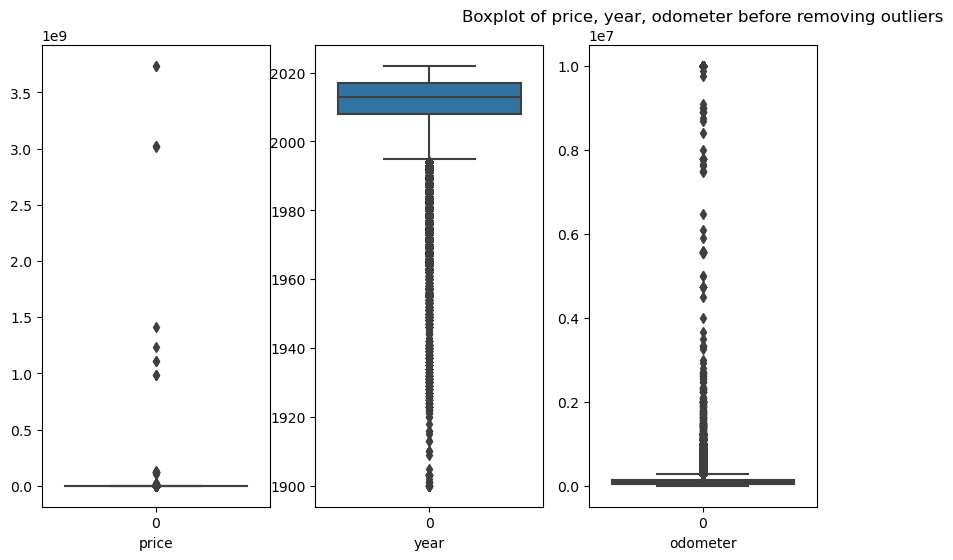

In [14]:
columns = ['price', 'year', 'odometer']
plt.figure(figsize=(10, 6))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(cars[columns[i]], orient='v')
    plt.xlabel(columns[i])
plt.title('Boxplot of price, year, odometer before removing outliers')
plt.savefig('images/boxplot_price_year_odometer_before_outliers.png')
plt.show()

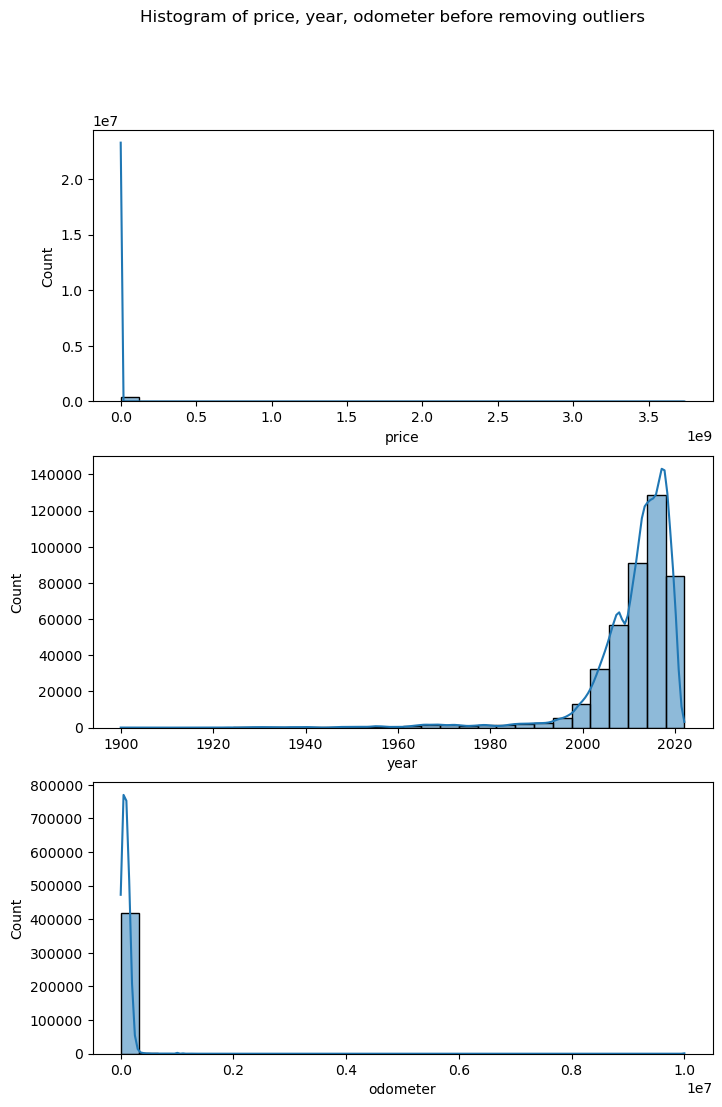

In [15]:
columns = ['price', 'year', 'odometer']
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Histogram of price, year, odometer before removing outliers')

for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=cars, x=column, kde=True, bins=30, ax=ax)
    ax.set_xlabel(column)
plt.savefig('images/histogram_price_year_odometer_before_outliers.png')
plt.show()

## Exploratory Data Analysis


In [16]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.000,7311486634.224,4473170.413,7207408119.000,7308143339.250,7312620821.000,7315253543.500,7317101084.000
price,426880.000,75199.033,12182282.174,0.000,5900.000,13950.000,26485.750,3736928711.000
year,425675.000,2011.235,9.452,1900.000,2008.000,2013.000,2017.000,2022.000
odometer,422480.000,98043.331,213881.501,0.000,37704.000,85548.000,133542.500,10000000.000


In [17]:
cars.describe(include='object').T

,count,unique,top,freq
region,426880,404,columbus,3608
manufacturer,409234,42,ford,70985
model,421603,29649,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524
VIN,265838,118246,1FMJU1JT1HEA52352,261
drive,296313,3,4wd,131904


In [18]:
# Finding unique values in each column for object type columns
unique_objects = {}
for column in cars.columns:
    if cars[column].dtype == 'object' and column not in ['region', 'model', 'state']:
        unique_objects[column] = cars[column].unique()
unique_objects


{'manufacturer': array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
        'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
        'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
        'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object),
 'condition': array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 'cylinders': array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
        'other', '3 cylinders', '10 cylinders', '12 cylinders'],
       dtype=object),
 'fuel': array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
        'parts only'

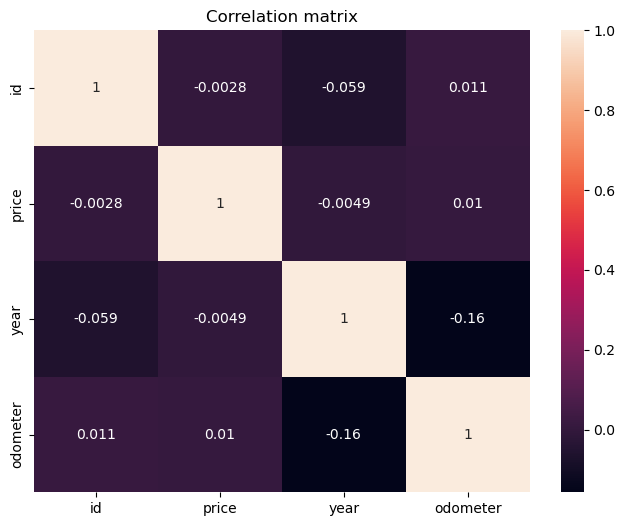

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(cars.corr(numeric_only=True), annot=True)
plt.title('Correlation matrix')
plt.savefig('images/correlation_matrix.png')
plt.show()



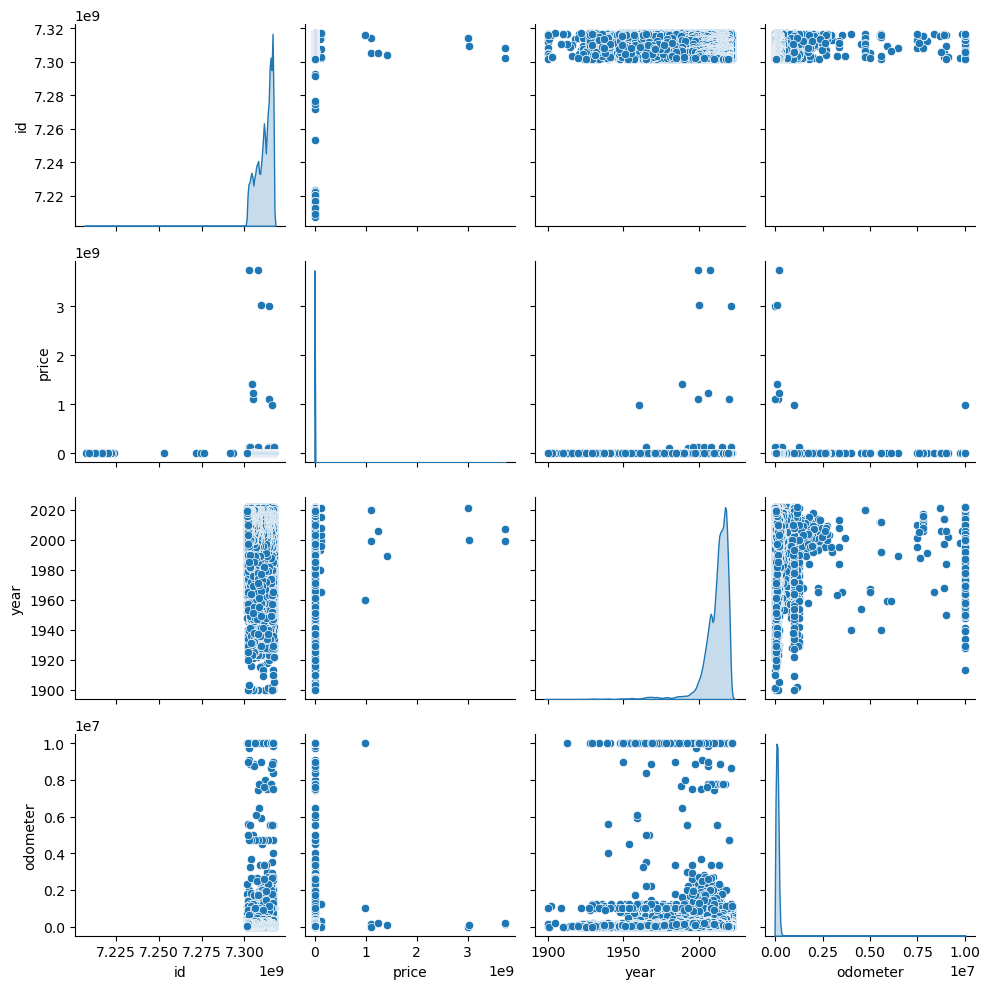

In [20]:
sns.pairplot(cars, diag_kind='kde')
plt.tight_layout()
plt.show()


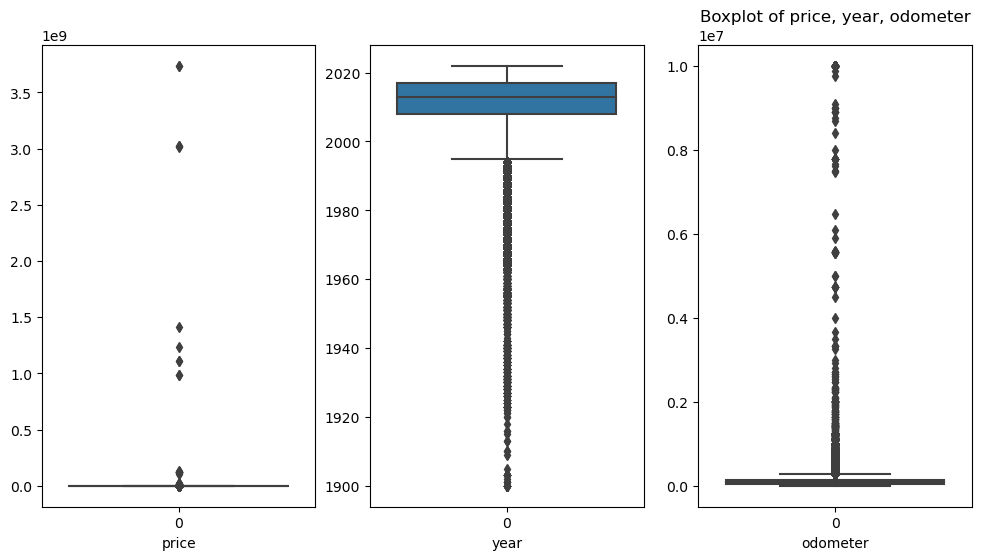

In [21]:
columns = ['price', 'year', 'odometer']
plt.figure(figsize=(12, 6))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(cars[columns[i]], orient='v')
    plt.xlabel(columns[i])
plt.title('Boxplot of price, year, odometer')
plt.show()



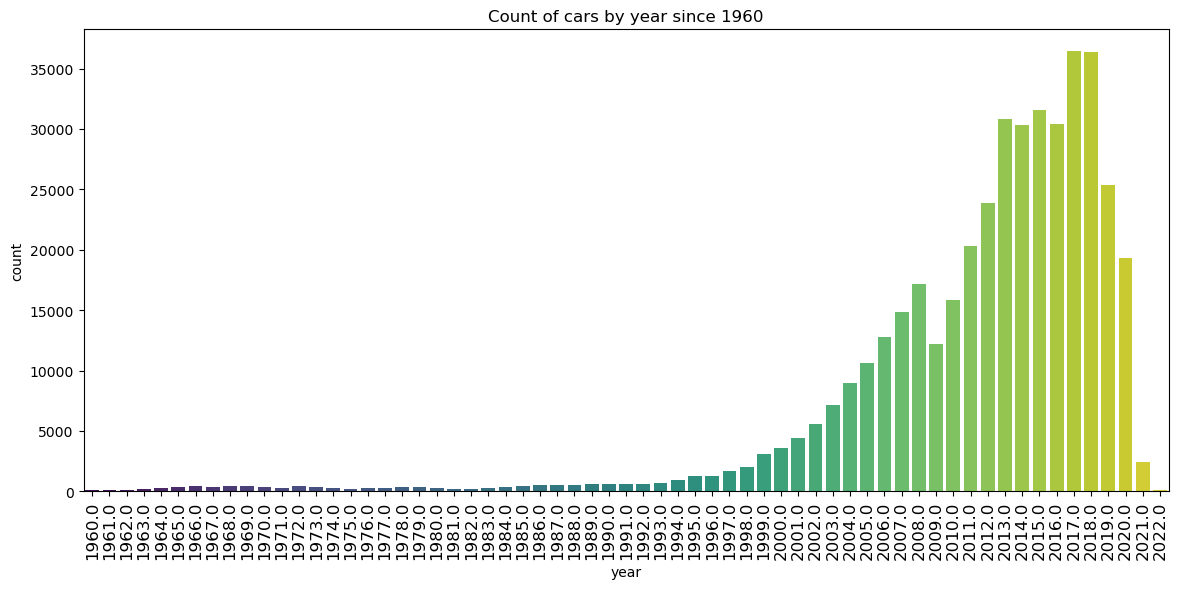

In [22]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='year', data=cars[cars['year'] >= 1960], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Count of cars by year since 1960')
plt.savefig('images/count_of_cars_by_year_since_1960.png')
plt.show()


In [23]:
sorted_manufacturer = cars.groupby('manufacturer')['price'].mean().sort_values(ascending=False).reset_index()


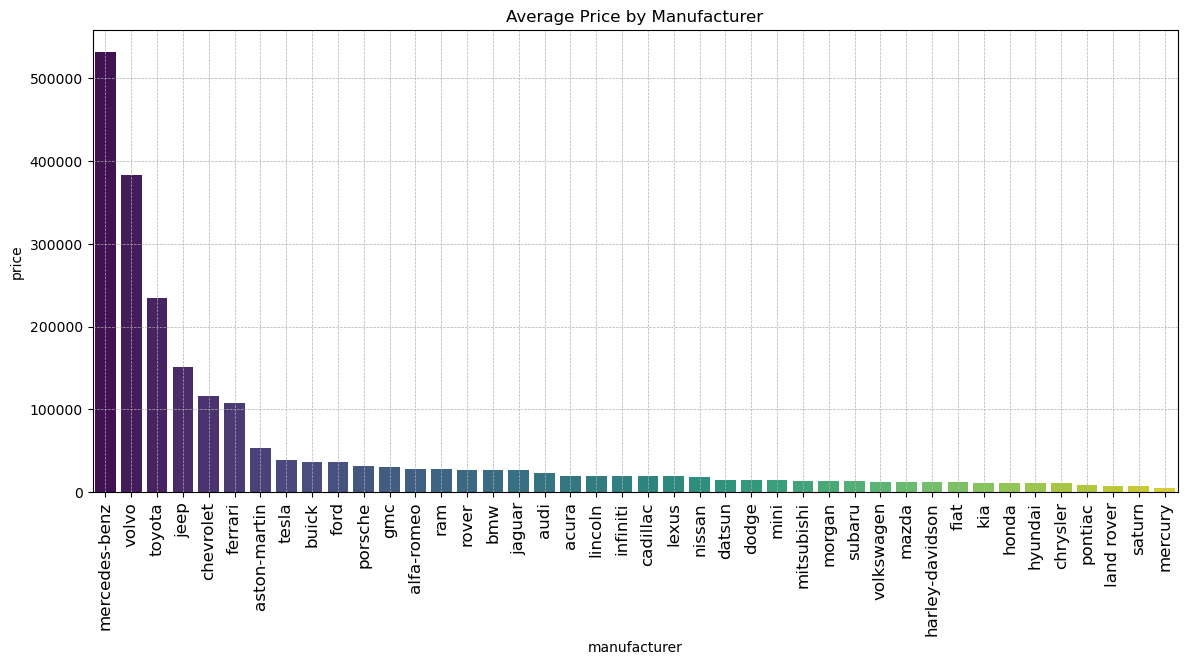

In [24]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='manufacturer', y='price', data=sorted_manufacturer, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Average Price by Manufacturer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('images/average_price_by_manufacturer.png')
plt.show()



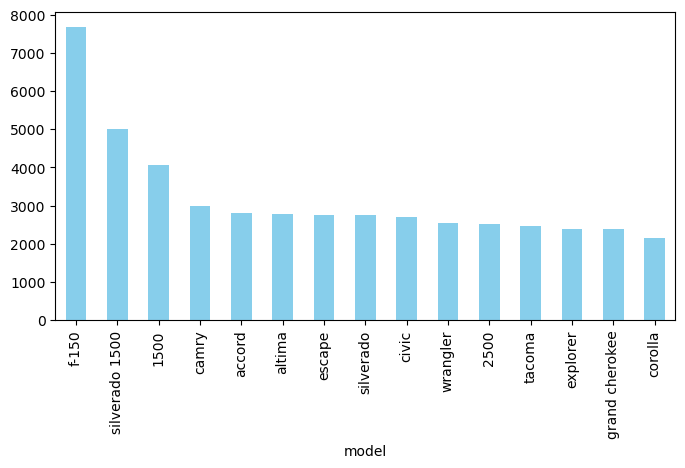

In [25]:
# Top 15 cars in the past 20 years
cars[cars['year'] >= 2000]['model'].value_counts().head(15).plot.bar(figsize=(8, 4), color='skyblue')
plt.savefig('images/top_15_cars_in_the_past_20_years.png')
plt.show()


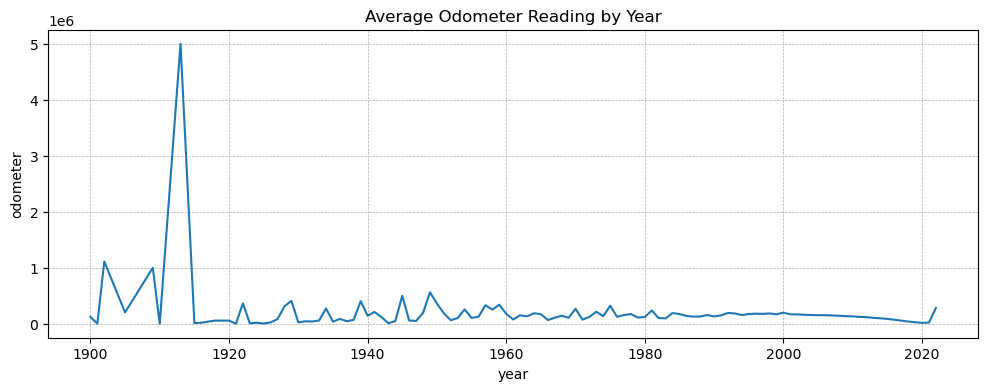

In [26]:
# Average Odomater reding by year
cars_year_odometer = cars.groupby('year')['odometer'].mean().reset_index()
plt.figure(figsize=(12, 4))
sns.lineplot(x='year', y='odometer', data=cars_year_odometer)
plt.title('Average Odometer Reading by Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('images/average_odometer_reading_by_year.png')
plt.show()


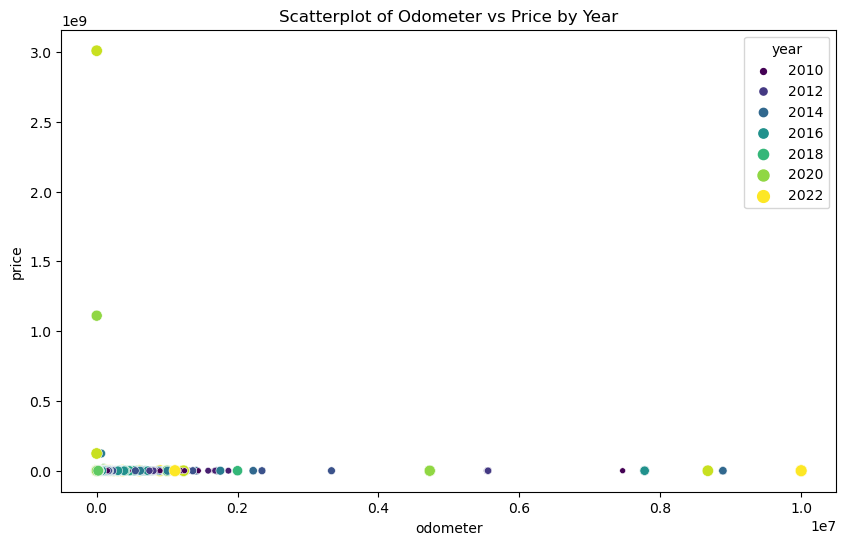

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=cars[cars['year'] >= 2010 ], hue='year', size='year', palette='viridis')
plt.title('Scatterplot of Odometer vs Price by Year')
plt.savefig('images/scatterplot_odometer_price_year.png')
plt.show()



['gas', 'other', 'diesel', 'hybrid', 'electric']


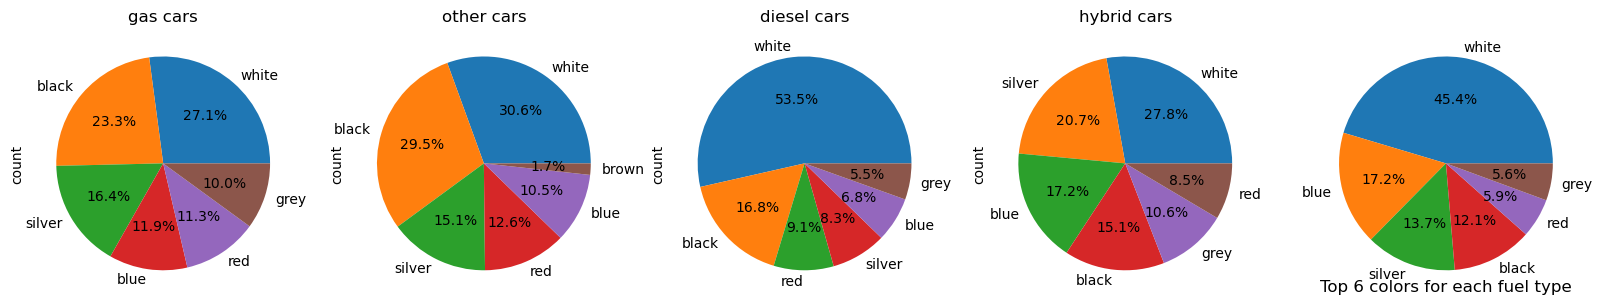

In [28]:
# Top 6 colors for each fuel type
unique_fuels = list(cars['fuel'].dropna().unique())
print(unique_fuels)
plt.figure(figsize=(4*len(unique_fuels), 5))
for index, fuel in enumerate(unique_fuels):
    plt.subplot(1, len(unique_fuels), index+1)
    cars[cars['fuel'] == fuel]['paint_color'].value_counts().head(6).plot.pie(autopct='%1.1f%%', title=f'{fuel} cars')
plt.axis('off')
plt.title('Top 6 colors for each fuel type', y=-0.01)
plt.savefig('images/top_6_colors_for_each_fuel_type.png')
plt.show()


From above box plots and histograms of `price`, `year`, `odometer`, we can see that there are some outliers in the data with `price` and `odometer` right skewed and we have have car models older than 25 years. We can remove them by using IQR method.

## Data Preparation
After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.



From above box plots and histograms of `price`, `year`, `odometer`, we can see that there are some outliers in the data with `price` and `odometer` right skewed and we have have car models older than 25 years. We can remove them by using IQR method.

#### Descriptive Statistics Summary

* The year ranges from 1900 to 2022, suggesting good possibility for inaccuracies or outliers.
* The price shows extreme variance, ranging from 0 to over 3 Billion, indicating potential outliers or incorrect entries.
* The odometer readings also show extreme values up to 10 million, which might be outliers or errors.

#### Missing Values Summary

* Significant missing data in columns such as condition, cylinders, VIN, drive, size, type, and paint_color.
* Less critical but still notable missing values in year, manufacturer, model, fuel, title_status and transmission.

#### Proposed Data Preparation Steps

**Handling outliers:**

* Remove cars older than 20 years from `year` i.e `year < 2000` as most of buyers are not interested in cars older than 20 years and they may not be able to find replacement parts easily.
* Remove outliers in `price` and `odometer` using IQR method.
* Drop rows with miles/year >= 30k.

**Handling Missing Values:**

* For missing `odometer` use mean for that year.
* Drop missing values for 'year' as they are only ~1200 out of 450k rows, then converting 'year' to int64.
* Drop type `bus` and title_status with `parts only`.
* For column `fuel` as `electric` i.e electric cars set appropriate values for 'cylinders' and 'transmission' i.e `0` and `automatic`.
* Remove models or manufacturer with Freightliner, International 4300, WORKHORSE  as they are trucks not cars using varaiable remove_models_containing.
* Using manufacturer_map to fill in null manufacturer.


**Drop columns which have no effect and unuseful rows:**
* Drop `id` and `VIN` columns.
* Drop columns like `model` which have too many unique values to be useful. Keep model for EDA and then drop it.

**Feature Engineering:**

* Calculate `car age` from the `year`.
* Categorize odometer into bands (e.g., `low`, `medium`, `high` mileage).

**Encoding Categorical Data:**

* One-hot encode categorical variables such as `manufacturer`, `fuel`, `drive`, and `transmission` for use in modeling.


In [29]:
cars_final = cars.copy()

In [30]:
# Assuming cars_final is your DataFrame
# Convert the 'model' column to lowercase
cars_final['model'] = cars_final['model'].str.lower()
cars_final['manufacturer'] = cars_final['manufacturer'].str.lower()


### Handling Missing Values

In [31]:
# Drop type `bus` and title_status with `parts only`.
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final = cars_final[cars_final['type'] != 'bus']
print(f'cars shape after removing type bus: {cars_final.shape}')
cars_final = cars_final[cars_final['title_status'] != 'parts only']
print(f'cars shape after removing title_status parts only: {cars_final.shape}')

cars shape before cleaning: (426880, 18)
cars shape after removing type bus: (426363, 18)
cars shape after removing title_status parts only: (426165, 18)


In [32]:
# Remove models or manufacturer with Freightliner, International 4300, WORKHORSE  as they
# are trucks not cars using varaiable remove_models_containing.
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final = cars_final[~cars_final['model'].str.contains('|'.join(remove_models_containing).lower(), case=False, na=False)]
print(f'cars shape after removing models containing remove_models_containing: {cars_final.shape}')

cars shape before cleaning: (426165, 18)
cars shape after removing models containing remove_models_containing: (423286, 18)


In [33]:
# For electric cars set appropriate values for 'cylinders' and 'transmission'. We have ~ 1400 electic cars

# Electric cars do not have cylinders but making it similar to v8 engine
cars_final.loc[cars_final['fuel'] == 'electric', 'cylinders'] = '8'
 # Electirc car tranismission type is single-speed but most of the users are not familiar
 # with this term and see it as automatic
cars_final.loc[cars_final['fuel'] == 'electric', 'transmission'] = 'automatic'
cars_final.loc[cars_final['fuel'] == 'electric'].head(3)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
1008,7309692127,birmingham,29890,2013.000,tesla,model s,NaN,8,electric,61591.000,clean,automatic,5YJSA1DN4DFP11483,rwd,NaN,sedan,grey,al
1333,7306565136,birmingham,32990,2013.000,tesla,model s,NaN,8,electric,69961.000,clean,automatic,5YJSA1CP3DFP25751,rwd,NaN,sedan,white,al
1357,7306134436,birmingham,38750,2018.000,tesla,model 3,NaN,8,electric,14452.000,clean,automatic,NaN,NaN,NaN,NaN,NaN,al


In [34]:
# Using manufacturer_map to fill in null manufacturer.
print(f'null manufacturer count before filling: {cars_final.isnull().sum()["manufacturer"]}')

def infer_manufacturer(row):
    if pd.isnull(row['manufacturer']):
        for key in manufacturer_map:
            if key in str(row['model']):
                return manufacturer_map[key]
    return row['manufacturer']

cars_final['manufacturer'] = cars_final.apply(infer_manufacturer, axis=1)
print(f'null manufacturer count after filling: {cars_final.isnull().sum()["manufacturer"]}')


null manufacturer count before filling: 14609
null manufacturer count after filling: 6853


In [35]:
# By using manufacturer_map we brought down the null manufacturer count from 4.1% to 0.65%.
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year            0.285
manufacturer    1.619
model           1.241
condition      40.769
cylinders      41.224
fuel            0.688
odometer        1.018
title_status    1.923
transmission    0.571
VIN            37.539
drive          30.416
size           71.788
type           21.550
paint_color    30.480
dtype: float64

In [36]:
# Finding unique values in each column for object type columns
unique_objects = {}
for column in cars_final.columns:
    if cars_final[column].dtype == 'object' and column not in ['region', 'model', 'state', 'VIN']:
        unique_objects[column] = cars_final[column].unique()
unique_objects


{'manufacturer': array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'scion', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
        'mitsubishi', 'smart fortwo', 'volkswagen', 'porsche', 'kia',
        'maserati', 'saab', 'suzuki', 'rover', 'ferrari', 'mini',
        'pontiac', 'fiat', 'genesis', 'isuzu', 'tesla', 'saturn',
        'mercury', 'harley-davidson', 'lamborghini', 'rolls-royce',
        'datsun', 'mclaren', 'lotus', 'aston-martin', 'land rover',
        'morgan'], dtype=object),
 'condition': array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 'cylinders': array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
        '3 cylinders', '10 cylinders', '8', '12 cylinders', 'other'],
       dtype=object),
 'fuel': array([nan, 'gas', 'o

We still need to impute below.

* `manufacturer`, `condition`, `fuel`, `title_status`, `drive`, `size` and `paint_color` with nan.
* `cylinders`, `transmission`, `type` with `other` and `nan`.


In [37]:
# By using manufacturer_map we brought down the null manufacturer count from 4.1% to 0.65%.
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year            0.285
manufacturer    1.619
model           1.241
condition      40.769
cylinders      41.224
fuel            0.688
odometer        1.018
title_status    1.923
transmission    0.571
VIN            37.539
drive          30.416
size           71.788
type           21.550
paint_color    30.480
dtype: float64

In [38]:
# # For columns ['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type'] use
# # `model` create a map with most popular i.e mode with key as model and value as the columns.
# # Use this map to impute columns.

columns = ['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

def process_column(column, df):
    # Generate model_to_column mapping
    model_to_column = df[df[column] != 'other'].groupby('model')[column].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

    # Cleaning model keys
    model_to_column = {k.lower(): v for k, v in model_to_column.items() if isinstance(k, str) and re.match(r'^[a-zA-Z0-9\s\-]+$', k)}

    def infer_column_from_model(row):
        if pd.isnull(row[column]) or row[column] == 'other':
            model_key = str(row['model']).lower()
            longest_match = None
            max_length = 0
            for key in model_to_column:
                if key in model_key and len(key) > max_length:
                    max_length = len(key)
                    longest_match = key
            return model_to_column.get(longest_match, row[column])
        return row[column]

    # Apply function to DataFrame
    updated_column = df.apply(infer_column_from_model, axis=1)

    # Collect diagnostics
    initial_null = df[column].isnull().sum()
    initial_other = (df[column] == 'other').sum()
    updated_null = updated_column.isnull().sum()
    updated_other = (updated_column == 'other').sum()

    return updated_column, (column, initial_null, initial_other, updated_null, updated_other)

# Using joblib's Parallel and delayed to process each column in parallel
results = Parallel(n_jobs=-1)(delayed(process_column)(column, cars_final.copy()) for column in columns)

# Update cars_final with new columns and print diagnostics
for result in results:
    updated_column, diagnostics = result
    column, initial_null, initial_other, updated_null, updated_other = diagnostics
    cars_final[column] = updated_column
    print(f'{column}: null and "other" count before filling: {initial_null}, {initial_other}')
    print(f'{column}: null and "other" count after filling: {updated_null}, {updated_other}')


manufacturer: null and "other" count before filling: 6853, 0
manufacturer: null and "other" count after filling: 5452, 0
cylinders: null and "other" count before filling: 174496, 1034
cylinders: null and "other" count after filling: 33598, 1
fuel: null and "other" count before filling: 2912, 30550
fuel: null and "other" count after filling: 754, 5
transmission: null and "other" count before filling: 2418, 61706
transmission: null and "other" count after filling: 136, 83
drive: null and "other" count before filling: 128748, 0
drive: null and "other" count after filling: 22274, 0
size: null and "other" count before filling: 303870, 0
size: null and "other" count after filling: 78513, 0
type: null and "other" count before filling: 91220, 21901
type: null and "other" count after filling: 12000, 85


In [41]:
cars_final.to_csv('data/cars_final_after_infer_column_from_model.csv', index=False)

In [42]:
cars_final = pd.read_csv('data/cars_final_after_infer_column_from_model.csv')

In [43]:
# By using manufacturer_map we brought down the null manufacturer count from 4.1% to 0.65%.
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year            0.285
manufacturer    1.288
model           1.241
condition      40.769
cylinders       7.937
fuel            0.178
odometer        1.018
title_status    1.923
transmission    0.032
VIN            37.539
drive           5.262
size           18.548
type            2.835
paint_color    30.480
dtype: float64

After using infer_column_from_model to figureout `null` and `other` values for ['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type'], we were able to reduce missing data percent to mostly single digit % multiple columns.

**nan Values**

* manufacturer: 4.13% to 1.28%.
* cylinders: 41.62% to 7.98%.
* fuel: 0.7% to 0.17%.
* transmission: 0.6% to 0.03%.
* drive: 30.58% to 5.29%.
* size: 71.77% to 18.63%.
* type: 21.75% to 2.86%.

**other values**

* cylinders: 1034 to 1
* fuel: 30550 to 5
* transmission: 61706 to 83
* type: 21901 to 85


In [44]:
# Remove `size` column.
cars_final.drop(columns=['size'], inplace=True)

impute cylinders, fuel, transmission, drive and type for a particular row based on the most popular value of the same for the same manufacturer.


In [45]:
def safe_mode(series):
    # Attempt to get the mode
    try:
        mode_val = series.mode()
        if mode_val.empty:
            return np.nan
        else:
            return mode_val.iloc[0]
    except:
        return np.nan

# Apply the safe_mode function to each relevant column in the grouped DataFrame
modes = cars_final.groupby('manufacturer')[['cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']].agg(safe_mode).reset_index()

mode_dict = {}
for _, row in modes.iterrows():
    mode_dict[row['manufacturer']] = {
        'cylinders': row['cylinders'][0] if isinstance(row['cylinders'], pd.Series) else row['cylinders'],
        'fuel': row['fuel'][0] if isinstance(row['fuel'], pd.Series) else row['fuel'],
        'transmission': row['transmission'][0] if isinstance(row['transmission'], pd.Series) else row['transmission'],
        'drive': row['drive'][0] if isinstance(row['drive'], pd.Series) else row['drive'],
        'type': row['type'][0] if isinstance(row['type'], pd.Series) else row['type'],
        'paint_color': row['paint_color'][0] if isinstance(row['paint_color'], pd.Series) else row['paint_color'],
    }

def impute_values(row):
    manufacturer = row['manufacturer']
    if pd.isnull(row['cylinders']) and manufacturer in mode_dict:
        row['cylinders'] = mode_dict[manufacturer]['cylinders']
    if pd.isnull(row['fuel']) and manufacturer in mode_dict:
        row['fuel'] = mode_dict[manufacturer]['fuel']
    if pd.isnull(row['transmission']) and manufacturer in mode_dict:
        row['transmission'] = mode_dict[manufacturer]['transmission']
    if pd.isnull(row['drive']) and manufacturer in mode_dict:
        row['drive'] = mode_dict[manufacturer]['drive']
    if pd.isnull(row['type']) and manufacturer in mode_dict:
        row['type'] = mode_dict[manufacturer]['type']
    if pd.isnull(row['paint_color']) and manufacturer in mode_dict:
        row['paint_color'] = mode_dict[manufacturer]['paint_color']
    return row

# Apply the function to the DataFrame
cars_final = cars_final.apply(impute_values, axis=1)


In [46]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year            0.285
manufacturer    1.288
model           1.241
condition      40.769
cylinders       0.452
fuel            0.023
odometer        1.018
title_status    1.923
transmission    0.009
VIN            37.539
drive           0.472
type            0.484
paint_color     0.593
dtype: float64

In [47]:
print(f'shape of cars_final before removing rows: {cars_final.shape}')
columns = ['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

for column in columns:
    cars_final = cars_final[cars_final[column] != 'other']
    cars_final = cars_final[cars_final[column].notnull()]
    cars_final.reset_index(drop=True, inplace=True)
    print(f'shape of cars_final after removing rows with null and "others" of {column}: {cars_final.shape}')

shape of cars_final before removing rows: (423286, 17)
shape of cars_final after removing rows with null and "others" of manufacturer: (417834, 17)
shape of cars_final after removing rows with null and "others" of cylinders: (417834, 17)
shape of cars_final after removing rows with null and "others" of fuel: (417834, 17)
shape of cars_final after removing rows with null and "others" of title_status: (409886, 17)
shape of cars_final after removing rows with null and "others" of transmission: (409805, 17)
shape of cars_final after removing rows with null and "others" of drive: (409805, 17)
shape of cars_final after removing rows with null and "others" of type: (409801, 17)
shape of cars_final after removing rows with null and "others" of paint_color: (409801, 17)


In [48]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year         0.153
model        1.257
condition   40.925
odometer     0.888
VIN         37.733
dtype: float64

In [49]:
# Remove model, condition, VIN columns
cars_final.drop(columns=['id', 'model', 'condition', 'VIN'], inplace=True)

In [50]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year       0.153
odometer   0.888
dtype: float64

In [51]:
cars_final.reset_index(drop=True, inplace=True)

In [52]:
cars_final.corr(numeric_only=True)


,price,year,odometer
price,1.000,-0.005,0.011
year,-0.005,1.000,-0.167
odometer,0.011,-0.167,1.000


In [53]:
# Drop rows with miles/year >= 30k
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final['miles_per_year'] = cars_final['odometer'] / (2022 - cars_final['year'] + 1)
cars_final = cars_final[cars_final['miles_per_year'] < 30000]
cars_final.drop(columns=['miles_per_year'], inplace=True)
print(f'cars shape after removing cars with miles/year >= 30k: {cars_final.shape}')
cars_final.reset_index(drop=True, inplace=True)

cars shape before cleaning: (409801, 13)
cars shape after removing cars with miles/year >= 30k: (404064, 13)


### Handling Outliers


In [54]:
# Remove cars older than 20 years from `year` i.e `year < 2000`.
print(f'Cars shape before cleaning: {cars.shape}')
cars_final = cars_final[cars_final['year'] >= 2000]
print(f'Cars shape after removing cars with year less than 2000: {cars_final.shape}')


Cars shape before cleaning: (426880, 18)
Cars shape after removing cars with year less than 2000: (381461, 13)


In [55]:
# Try to remove outliers in `price` and `odometer` using IQR method.
q1_price = cars_final['price'].quantile(0.25)
q3_price = cars_final['price'].quantile(0.75)
IRQ_price = q3_price - q1_price

q1_odometer = cars_final['odometer'].quantile(0.25)
q3_odometer = cars_final['odometer'].quantile(0.75)
IRQ_odometer = q3_odometer - q1_odometer


lower_bound_price = q1_price - 1.5 * IRQ_price
upper_bound_price = q3_price + 1.5 * IRQ_price
print(f'Lower bound price: {lower_bound_price}')
print(f'Upper bound price: {upper_bound_price}')

lower_bound_odometer = q1_odometer - 1.5 * IRQ_odometer
upper_bound_odometer = q3_odometer + 1.5 * IRQ_odometer
print(f'Lower bound odometer: {lower_bound_odometer}')
print(f'upper bound odometer: {upper_bound_odometer}')


Lower bound price: -25000.0
Upper bound price: 58184.0
Lower bound odometer: -103797.0
upper bound odometer: 272131.0


In [56]:
# overriding the lower bounds for price and odometer with appropriate values from my educated guess to include high end cars.
lower_bound_price = 1000
lower_bound_odometer = 10


In [57]:
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final = cars_final[(cars_final['price'] >= lower_bound_price) & (cars_final['price'] <= upper_bound_price)]
print(f'cars shape after removing outliers in price: {cars_final.shape}')
cars_final = cars_final[(cars_final['odometer'] >= lower_bound_odometer) & (cars_final['odometer'] <= upper_bound_odometer)]
print(f'cars shape after removing outliers in odometer: {cars_final.shape}')


cars shape before cleaning: (381461, 13)
cars shape after removing outliers in price: (335570, 13)
cars shape after removing outliers in odometer: (331897, 13)


In [58]:
cars_final['cylinders'].replace(' cylinders', '', regex=True, inplace=True)

In [59]:
# converting cylinders to int
cars_final['cylinders'] = cars_final['cylinders'].astype(int)

In [60]:
cars_final.reset_index(drop=True, inplace=True)

In [61]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)

In [62]:
cars_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331897 entries, 0 to 331896
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        331897 non-null  object 
 1   price         331897 non-null  int64  
 2   year          331897 non-null  float64
 3   manufacturer  331897 non-null  object 
 4   cylinders     331897 non-null  int64  
 5   fuel          331897 non-null  object 
 6   odometer      331897 non-null  float64
 7   title_status  331897 non-null  object 
 8   transmission  331897 non-null  object 
 9   drive         331897 non-null  object 
 10  type          331897 non-null  object 
 11  paint_color   331897 non-null  object 
 12  state         331897 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 32.9+ MB


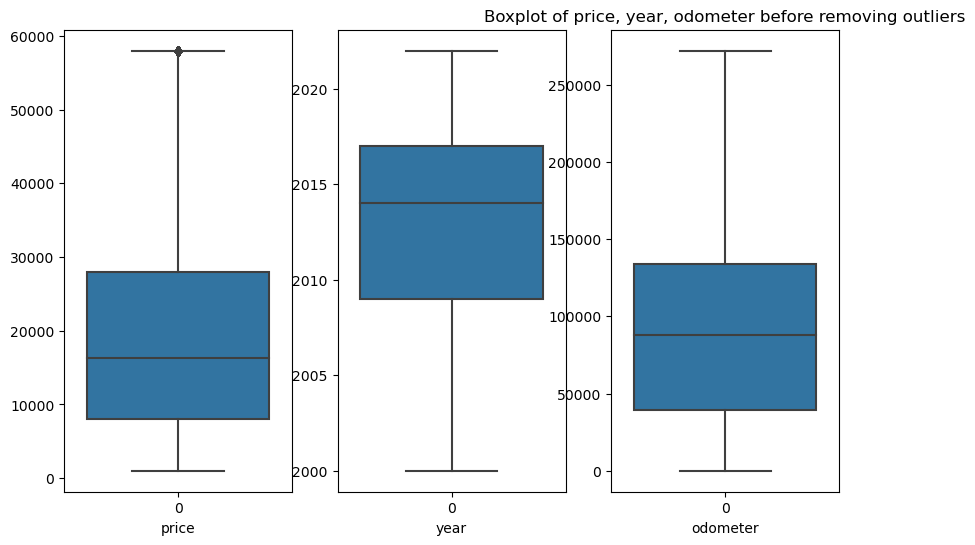

In [63]:
columns = ['price', 'year', 'odometer']
plt.figure(figsize=(10, 6))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(cars_final[columns[i]], orient='v')
    plt.xlabel(columns[i])
plt.title('Boxplot of price, year, odometer before removing outliers')
plt.savefig('images/boxplot_price_year_odometer_before_outliers.png')
plt.show()

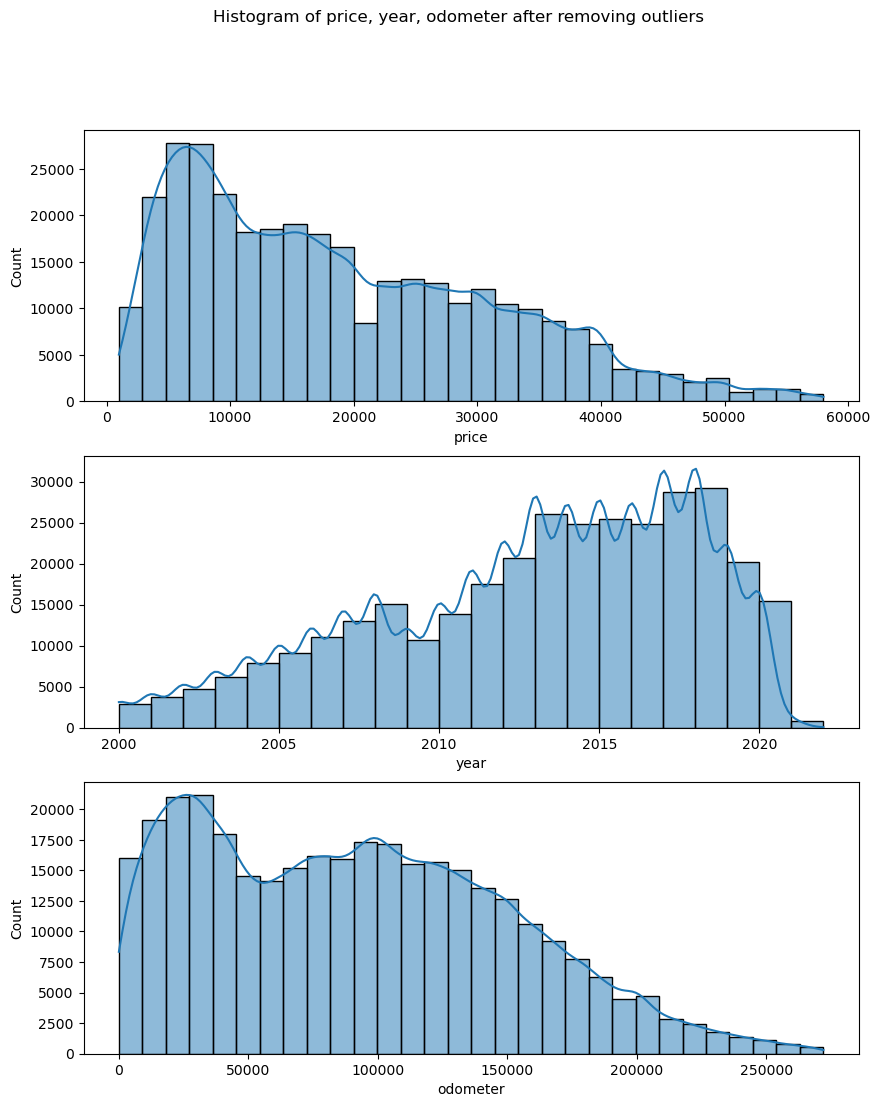

In [64]:
columns = ['price', 'year', 'odometer']
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle('Histogram of price, year, odometer after removing outliers')
for i, column in enumerate(columns):
    ax = axes[i]
    bins = 30
    if column == 'year':
        bins = 22
    sns.histplot(data=cars_final, x=column, kde=True, bins=bins, ax=ax)
    ax.set_xlabel(column)
plt.savefig('images/histogram_price_year_odometer_after_outliers.png')
plt.show()

## Pre-Processing

* Categorical:
  * One hot encoding
  * target encoding?
  * Ordinal encoding
* numerical:
  * standard scaling
  * log transformation?
* Test train split
  * scaling after test split
* Imputation after test train split


In [65]:
cars_pp = cars_final.copy()

In [66]:
cars_pp.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,auburn,33590,2014.000,gmc,8,gas,57923.000,clean,automatic,4wd,pickup,white,al
1,auburn,22590,2010.000,chevrolet,8,gas,71229.000,clean,automatic,4wd,pickup,blue,al
2,auburn,39590,2020.000,chevrolet,8,gas,19160.000,clean,automatic,4wd,pickup,red,al
3,auburn,30990,2017.000,toyota,8,gas,41124.000,clean,automatic,4wd,pickup,red,al
4,auburn,15000,2013.000,ford,6,gas,128000.000,clean,automatic,rwd,truck,black,al


In [67]:
cars_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331897 entries, 0 to 331896
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        331897 non-null  object 
 1   price         331897 non-null  int64  
 2   year          331897 non-null  float64
 3   manufacturer  331897 non-null  object 
 4   cylinders     331897 non-null  int64  
 5   fuel          331897 non-null  object 
 6   odometer      331897 non-null  float64
 7   title_status  331897 non-null  object 
 8   transmission  331897 non-null  object 
 9   drive         331897 non-null  object 
 10  type          331897 non-null  object 
 11  paint_color   331897 non-null  object 
 12  state         331897 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 32.9+ MB


In [68]:
# Drop columns which we are not going to use for prediction.
drop_columns = ['region', 'paint_color', 'state']
cars_pp.drop(columns=drop_columns, inplace=True)

In [69]:
unique_objects = {}
for column in cars_pp.columns:
    if cars_pp[column].dtype == 'object':
        unique_objects[column] = cars_pp[column].unique()
unique_objects


{'manufacturer': array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'scion', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
        'mitsubishi', 'smart fortwo', 'volkswagen', 'porsche', 'kia',
        'maserati', 'suzuki', 'rover', 'mini', 'pontiac', 'fiat',
        'genesis', 'isuzu', 'tesla', 'saturn', 'mercury', 'saab',
        'harley-davidson', 'datsun', 'lotus', 'aston-martin', 'land rover',
        'morgan', 'ferrari'], dtype=object),
 'fuel': array(['gas', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array(['clean', 'rebuilt', 'lien', 'salvage', 'missing'], dtype=object),
 'transmission': array(['automatic', 'manual'], dtype=object),
 'drive': array(['4wd', 'rwd', 'fwd'], dtype=object),
 'type': array(['pickup', 'truck', 'coupe', 'SUV', 'convertible', 'hatchback',
        'mini

In [72]:
# Experiment with label encoder
cars_pp_le = cars_pp.copy()

In [73]:
# One hot encoding for object columns
object_cols = ['manufacturer', 'fuel', 'transmission', 'drive', 'type']

cars_pp = pd.get_dummies(cars_pp, columns=object_cols, drop_first=True)

In [74]:
# Label encoding for title_status
title_status_mapping = {
    'clean': 4,     # Highest quality
    'rebuilt': 3,   # Repaired, next best
    'lien': 2,      # Neutral, ownership under lien
    'salvage': 1,   # Damaged significantly
    'missing': 0    # No title, most problematic
}
cars_pp['title_status'] = cars_pp['title_status'].map(title_status_mapping)



In [75]:
cars_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331897 entries, 0 to 331896
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   price                         331897 non-null  int64  
 1   year                          331897 non-null  float64
 2   cylinders                     331897 non-null  int64  
 3   odometer                      331897 non-null  float64
 4   title_status                  331897 non-null  int64  
 5   manufacturer_alfa-romeo       331897 non-null  bool   
 6   manufacturer_aston-martin     331897 non-null  bool   
 7   manufacturer_audi             331897 non-null  bool   
 8   manufacturer_bmw              331897 non-null  bool   
 9   manufacturer_buick            331897 non-null  bool   
 10  manufacturer_cadillac         331897 non-null  bool   
 11  manufacturer_chevrolet        331897 non-null  bool   
 12  manufacturer_chrysler         331897 non-nul

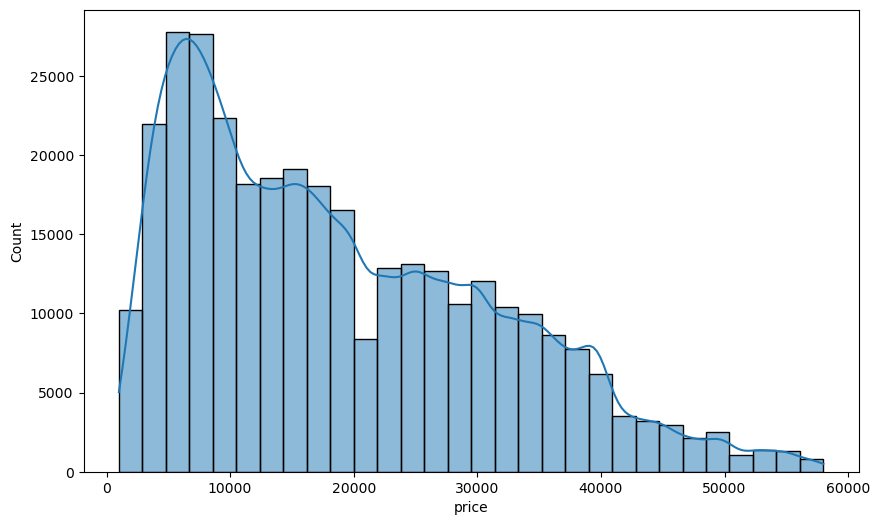

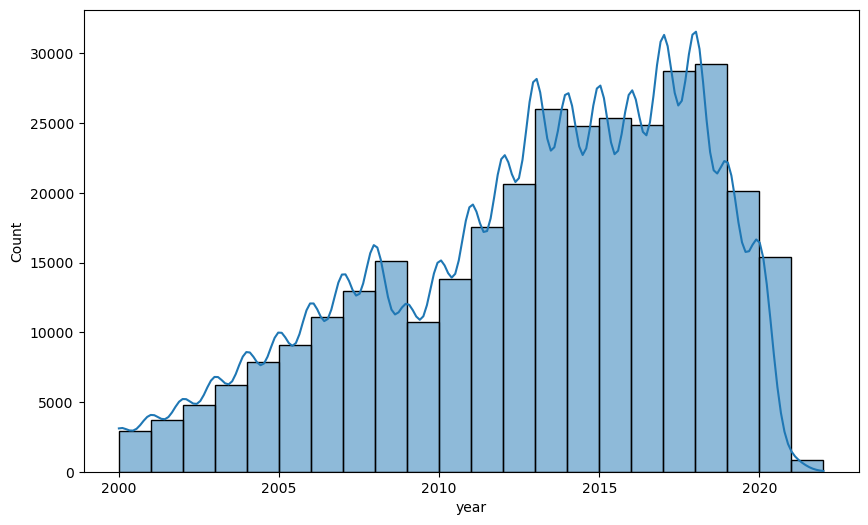

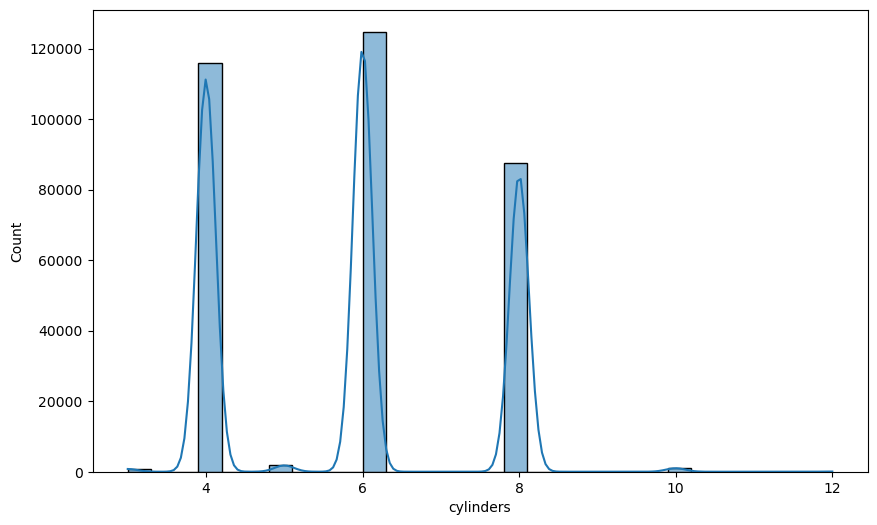

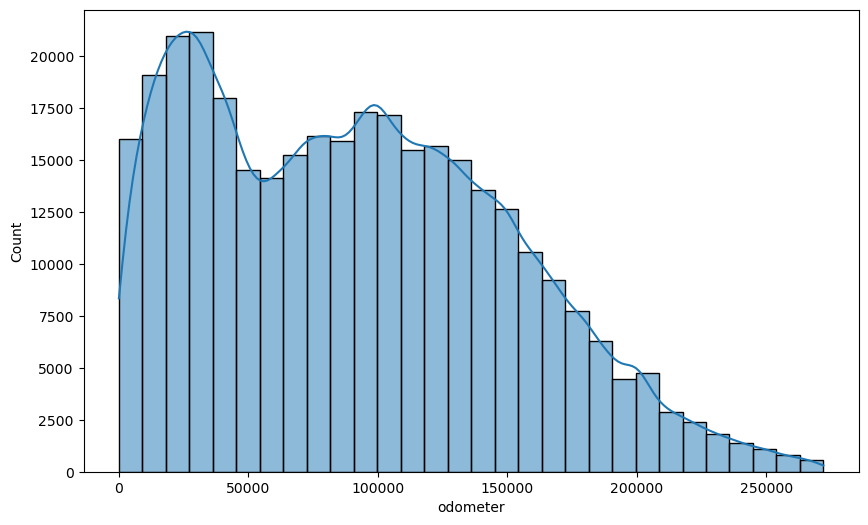

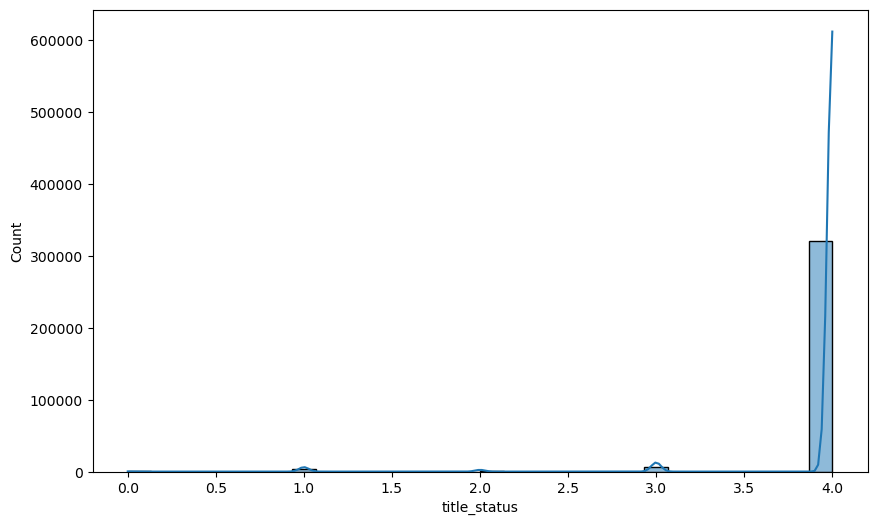

In [76]:
for column in cars_pp.columns:
    if cars_pp[column].dtype not in ['object', 'bool']:
        bins = 30
        if column == 'year':
            bins = 22
        plt.figure(figsize=(10, 6))
        sns.histplot(cars_pp[column], kde=True, bins=bins)
        plt.show()

### Test, train split


In [77]:
X = cars_pp.drop(columns='price')
y = cars_pp['price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [208]:
X.shape

(331897, 69)

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

* Models:
  * linear
  * Lasso
  * ridge

In [ ]:
model_performance_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2'])


In [112]:
def model_performance_df_concat(model_name, model, perf_df):
    return pd.concat(
    [perf_df,
     pd.DataFrame([{
        'Model': model_name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
        'Train R2': model.score(X_train, y_train),
        'Test R2': model.score(X_test, y_test)
        }])
    ],
    ignore_index=True
    )


### Linear regression

In [144]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
linear_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [145]:
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

In [172]:
model_performance_df = model_performance_df_concat('Linear Regression', linear_pipeline, model_performance_df)

In [240]:
model_performance_df[model_performance_df['Model'] == 'Linear Regression']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,5955.837,5940.179,0.775,0.775
4,Linear Regression,5955.837,5940.179,0.775,0.775
5,Linear Regression,5955.837,5940.179,0.775,0.775


In [251]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
linear_pipeline_kfold_scores = cross_val_score(
    estimator=linear_pipeline, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
linear_pipeline_kfold_scores

Time taken: 16.714704751968384


array([-5969.56998396, -5956.39250288, -5961.321464  , -6004.04417176,
       -5907.20673925, -5951.7804011 , -5949.33245583, -5921.85497659,
       -5933.80438674, -5967.66680702])

In [115]:
y_pred_linear = linear_pipeline.predict(X_test)

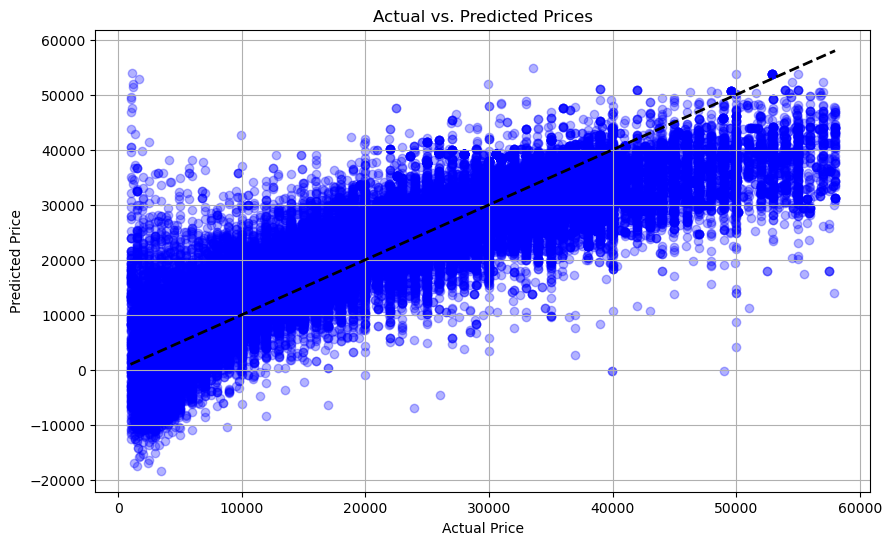

In [116]:
# Scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
# plot actual vs predicted values as scatter plot
plt.scatter(y_test, y_pred_linear, alpha=0.3, color='blue')
# a diagonal line where actual = predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


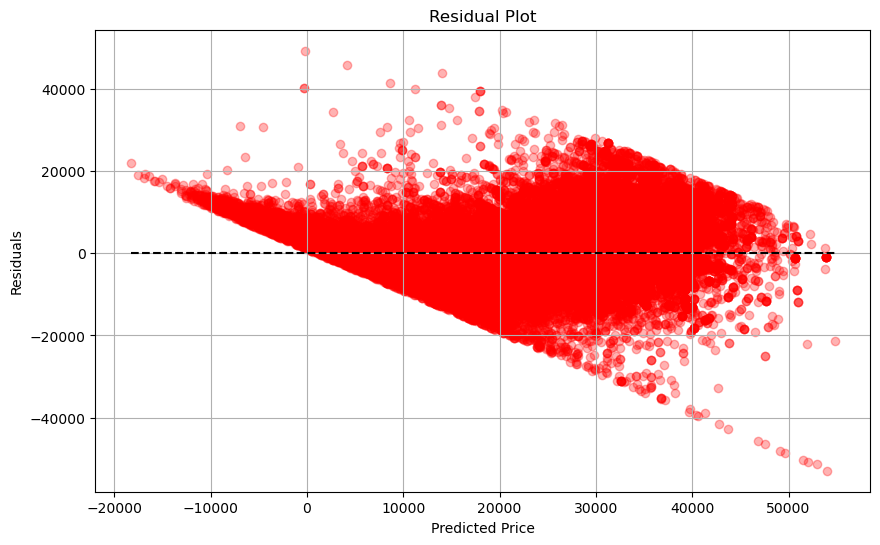

In [117]:
# Residual plot
residuals = y_test - y_pred_linear

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.3, color='red')
plt.hlines(y=0, xmin=y_pred_linear.min(), xmax=y_pred_linear.max(), colors='black', linestyles='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


### LinearRegression with SequentialFeatureSelector and GridSearchCV

In [209]:
linear_sfs_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])
linear_sfs_param_dict = {'feature_selection__n_features_to_select': [5, 10, 15, 20]}
linear_sfs_grid = GridSearchCV(
    linear_seqselector_pipeline,
    param_grid=linear_sfs_param_dict,
    cv=5,
    n_jobs=-1)

linear_sfs_grid_model = linear_sfs_grid.fit(X_train, y_train)


In [211]:
linear_sfs_grid_best_model = linear_sfs_grid_model.best_estimator_.fit(X_train, y_train)
print(f'Best parameters: {linear_sfs_grid_model.best_params_}')
print(f'Grid best model: {linear_sfs_grid_model}')


Best parameters: {'feature_selection__n_features_to_select': 20}
Grid best model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SequentialFeatureSelector(estimator=LinearRegression())),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'feature_selection__n_features_to_select': [5, 10, 15,
                                                                     20]})


### LinearRegression with RobustScaler

In [214]:
linear_rs_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LinearRegression())
])
linear_rs_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('model', LinearRegression())])

In [215]:
model_performance_df = model_performance_df_concat(
    'Linear Regression with RobustScaler',
    linear_rs_pipeline,
    model_performance_df
)
model_performance_df[model_performance_df['Model'] == 'Linear Regression with RobustScaler']


,Model,Train RMSE,Test RMSE,Train R2,Test R2
12,Linear Regression with RobustScaler,5955.837,5940.179,0.775,0.775


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
linear_rs_pipeline_kfold_scores = cross_val_score(
    estimator=linear_rs_pipeline, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
linear_rs_pipeline_kfold_scores

### LinearRegression with QuantileTransformer

In [227]:
linear_qt_pipeline = Pipeline([
    ('scaler', QuantileTransformer(random_state=25)),
    ('model', LinearRegression())
])
linear_qt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', QuantileTransformer(random_state=25)),
                ('model', LinearRegression())])

In [228]:
model_performance_df = model_performance_df_concat(
    'Linear Regression with QuantileTransformer',
    linear_qt_pipeline,
    model_performance_df
)
model_performance_df[model_performance_df['Model'] == 'Linear Regression with QuantileTransformer']


,Model,Train RMSE,Test RMSE,Train R2,Test R2
13,Linear Regression with QuantileTransformer,5781.934,5768.683,0.788,0.788
14,Linear Regression with QuantileTransformer,5780.423,5767.572,0.788,0.788
15,Linear Regression with QuantileTransformer,5783.900,5770.942,0.788,0.788
16,Linear Regression with QuantileTransformer,5783.900,5770.942,0.788,0.788


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
linear_qt_pipeline_kfold_scores = cross_val_score(
    estimator=linear_qt_pipeline, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
linear_qt_pipeline_kfold_scores

### Ridge Regression with GridSearchCV

In [91]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
ridge_parm_dict = {'model__alpha': [0.01, 0.1, 1, 10, 25]}

selector_ridge_grid = GridSearchCV(ridge_pipeline, param_grid=ridge_parm_dict, cv=5, n_jobs=-1)
ridge_gride_model = selector_ridge_grid.fit(X_train, y_train)


In [92]:
ridge_best_model = ridge_gride_model.best_estimator_.fit(X_train, y_train)
print(f'Ridge model: {ridge_gride_model}')
print(f'Ridge best model: {ridge_best_model}')


Ridge model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10, 25, 50,
                                          100]})
Ridge best model: Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=10))])


In [93]:
ridge_best_alpha = ridge_best_model.get_params()['model__alpha']
ridge_best_alpha

10

In [94]:
ridge_best_model.predict(X_train)

array([21005.17059686, 32870.0094797 , 17559.31207789, ...,
       23077.29184014, 17308.75404383, 25531.86093201])

In [180]:
importance_ridge_best_model = permutation_importance(ridge_best_model, X_test, y_test, n_repeats=10, random_state=25, n_jobs=-1)

In [181]:

importance_ridge_best_model_df = pd.DataFrame({'features': X_test.columns, 'importance': importance_ridge_best_model.importances_mean})
importance_ridge_best_model_df = importance_ridge_best_model_df.sort_values('importance', ascending=False)
fig = px.bar(importance_ridge_best_model_df[:15], x='importance', y='features', title="Feature Importance: Ridge with GridSearchCV without fs", orientation='h', height=800, width=1000)
fig.write_image('feature importance - Ridge with GridSearchCV without fs.png')
fig.show()


In [183]:
model_performance_df = model_performance_df_concat('Ridge with GridSearchCV without fs',
                                                   ridge_best_model,
                                                  model_performance_df)
model_performance_df[model_performance_df['Model'] == 'Ridge with GridSearchCV without fs']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
6,Ridge with GridSearchCV without fs,6323.356,6297.389,0.747,0.747
7,Ridge with GridSearchCV without fs,6323.356,6297.389,0.747,0.747


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
ridge_gride_kfold_scores = cross_val_score(
    estimator=ridge_best_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
ridge_gride_kfold_scores

### Ridge Regression with PolynomialFeatures


In [237]:
ridge_poly_no_sfs_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=ridge_best_alpha, random_state=25))
])
ridge_poly_no_sfs_model = ridge_poly_no_sfs_pipeline.fit(X_train, y_train)
ridge_poly_no_sfs_coefs = ridge_poly_no_sfs_model.named_steps['model'].coef_

print(f'ridge model: {ridge_poly_no_sfs_model}')
print(f'ridge Coefficients: {ridge_poly_no_sfs_coefs}')


ridge model: Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', Ridge(alpha=10, random_state=25))])
ridge Coefficients: [-11169.05199409 -11254.91330389  17124.42447884 ...   1189.14673799
      0.           1255.69946146]


In [238]:
model_performance_df = model_performance_df_concat('Ridge with Poly features',
                                                  ridge_poly_no_sfs_model,
                                                  model_performance_df)
model_performance_df[model_performance_df['Model'] == 'Ridge with Poly features']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
20,Ridge with Poly features,5180.567,5189.849,0.830,0.828


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
ridge_poly_no_sfs_model_kfold_scores = cross_val_score(
    estimator=ridge_poly_no_sfs_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
ridge_poly_no_sfs_model_kfold_scores

### LASSO Regression with GridSearchCV

In [192]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])
lasso_parm_dict = {'model__alpha': [0.01, 0.1, 1, 10, 25]}
selector_lasso_grid = GridSearchCV(lasso_pipeline, param_grid=lasso_parm_dict, cv=5, n_jobs=-1)
lasso_grid_model = selector_lasso_grid.fit(X_train, y_train)

In [230]:
lasso_grid_best_model = lasso_grid_model.best_estimator_.fit(X_train, y_train)
lasso_best_alpha = lasso_grid_best_model.get_params()['model__alpha']
lasso_grid_best_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': Lasso(alpha=0.1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__alpha': 0.1,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': 1000,
 'model__positive': False,
 'model__precompute': False,
 'model__random_state': None,
 'model__selection': 'cyclic',
 'model__tol': 0.0001,
 'model__warm_start': False}

In [231]:
model_performance_df = model_performance_df_concat('LASSO with GridSearchCV',
                                                   lasso_grid_best_model,
                                                   model_performance_df)
model_performance_df[model_performance_df['Model'] == 'LASSO with GridSearchCV']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
8,LASSO with GridSearchCV,5955.837,5940.170,0.775,0.775
18,LASSO with GridSearchCV,5955.837,5940.170,0.775,0.775


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
lasso_grid_best_model_kfold_scores = cross_val_score(
    estimator=lasso_grid_best_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
lasso_grid_best_model_kfold_scores

### Polynomial Regression

In [195]:
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

poly_model = poly_pipeline.fit(X_train, y_train)

In [207]:
model_performance_df = model_performance_df_concat('Polynomial Regression',
                                                  poly_model,
                                                  model_performance_df)
model_performance_df[model_performance_df['Model'] == 'Polynomial Regression']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
9,Polynomial Regression,4900.222,2833767795353326.500,0.848,-51223426043674871463936.000
11,Polynomial Regression,4900.222,2833767795353326.500,0.848,-51223426043674871463936.000


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
poly_model_kfold_scores = cross_val_score(
    estimator=poly_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
poly_model_kfold_scores

### Polynomial Regression with SequentialFeatureSelector

In [205]:
# poly_sfs_pipeline = Pipeline([
#     ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
#     ('scaler', StandardScaler()),
#     ('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=15)),
#     ('model', LinearRegression())
# ])
# poly_sfs_model = poly_sfs_pipeline.fit(X_train, y_train)

In [206]:
# model_performance_df = model_performance_df_concat('Polynomial Regression with sfs',
#                                                   poly_sfs_model,
#                                                   model_performance_df)
# model_performance_df[model_performance_df['Model'] == 'Polynomial Regression with sfs']

### Random forest

In [203]:
rf_pipeline = Pipeline([
    ('Scaler', RobustScaler()),
    ('model', RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=25))
])
rf_model = rf_pipeline.fit(X_train, y_train)

In [204]:
model_performance_df = model_performance_df_concat('Random forest',
                                                  rf_model,
                                                  model_performance_df)
model_performance_df[model_performance_df['Model'] == 'Random forest']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
10,Random forest,1268.492,3305.760,0.990,0.930


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
rf_model_kfold_scores = cross_val_score(
    estimator=rf_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
rf_model_kfold_scores

### LASSO Regression with PolynomialFeatures

In [233]:
lasso_poly_no_sfs_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=lasso_best_alpha, random_state=25))
])
lasso_poly_no_sfs_model = lasso_poly_no_sfs_pipeline.fit(X_train, y_train)
lasso_poly_no_sfs_coefs = lasso_poly_no_sfs_model.named_steps['model'].coef_

print(f'Lasso model: {lasso_poly_no_sfs_model}')
print(f'Lasso Coefficients: {lasso_poly_no_sfs_coefs}')


Lasso model: Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.1, random_state=25))])
Lasso Coefficients: [ 5110.62749991  4551.79758822 -1431.39147809 ...  1055.63882
     0.           -65.94402467]


In [234]:
model_performance_df = model_performance_df_concat('Lasso with Poly features',
                                                  lasso_poly_no_sfs_model,
                                                  model_performance_df)
model_performance_df[model_performance_df['Model'] == 'Lasso with Poly features']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
19,Lasso with Poly features,5210.652,5215.862,0.828,0.826


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
lasso_poly_no_sfs_model_kfold_scores = cross_val_score(
    estimator=lasso_poly_no_sfs_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
lasso_poly_no_sfs_model_kfold_scores

### LASSO Regression with PolynomialFeatures with SequentialFeatureSelector

In [103]:
lasso_poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=8)),
    ('model', Lasso(random_state=25))
])
lasso_model = lasso_poly_pipeline.fit(X_train, y_train)
lasso_coefs = lasso_model.named_steps['model'].coef_

print(f'Lasso model: {lasso_model}')
print(f'Lasso Coefficients: {lasso_coefs}')


Lasso model: Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('feature_selection',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=8)),
                ('model', Lasso(random_state=25))])
Lasso Coefficients: [ 3997.20596755   881.12954537  2111.69561972  2772.52636978
 -4178.09329712 -4980.33861996  2258.9361554    954.26464232]


In [229]:
model_performance_df = model_performance_df_concat('Lasso with poly and sfs',
                                                  lasso_model,
                                                  model_performance_df)

model_performance_df[model_performance_df['Model'] == 'Lasso with poly and sfs']

,Model,Train RMSE,Test RMSE,Train R2,Test R2
17,Lasso with poly and sfs,6545.251,6535.602,0.729,0.728


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=28)
start_time = time()
lasso_model_kfold_scores = cross_val_score(
    estimator=lasso_model, X=X, y=y, cv=kfold, n_jobs=-1, scoring='neg_root_mean_squared_error'
)
end_time = time()
time_taken = end_time - start_time
print(f'Time taken: {time_taken}')
lasso_model_kfold_scores

In [105]:
# Access the steps
poly_features = lasso_poly_pipeline.named_steps['poly_features']
scaler = lasso_poly_pipeline.named_steps['scaler']  # Though not directly needed for feature names
selector = lasso_poly_pipeline.named_steps['feature_selection']
lasso = lasso_poly_pipeline.named_steps['model']

# Get feature names after polynomial transformation
all_features = poly_features.get_feature_names_out(input_features=X_train.columns)

# Boolean mask of selected features
selected_mask = selector.get_support()

# Selected feature names
selected_features = [all_features[i] for i in range(len(all_features)) if selected_mask[i]]

# Coefficients from the Lasso model
coefficients = lasso.coef_

# Filter non-zero coefficients and their corresponding feature names
non_zero_mask = coefficients != 0
non_zero_features = [selected_features[i] for i in range(len(coefficients)) if non_zero_mask[i]]
non_zero_coefficients = coefficients[non_zero_mask]

# Print the features and their coefficients
features_and_coefficients = dict(zip(non_zero_features, non_zero_coefficients))
print(features_and_coefficients)


{'year': 3997.2059675486666, 'cylinders': 881.1295453673803, 'year^2': 2111.6956197152012, 'year cylinders': 2772.5263697777223, 'year drive_fwd': -4178.093297119629, 'odometer fuel_gas': -4980.3386199647475, 'odometer drive_fwd': 2258.9361553971557, 'title_status type_truck': 954.264642321024}


### Linear Regression with polynomial features using LASSO

In [ ]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Lasso())),
    ('model', LinearRegression())
])

linear_poly_lasso = pipeline.fit(X_train, y_train)


In [ ]:
lasso_model = pipeline.named_steps['feature_selection'].estimator_
non_zero_weights = np.sum(lasso_model.coef_ != 0)
total_features = lasso_model.coef_.shape[0]

print(f"Non-zero weights: {non_zero_weights} out of {total_features}")


In [ ]:
model_performance_df = pd.concat(
    [model_performance_df,
     pd.DataFrame([{
        'Model': 'Linear Regression with Lasso Feature Selection',
        'Train RMSE': np.sqrt(mean_squared_error(y_train, linear_poly_lasso.predict(X_train))),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, linear_poly_lasso.predict(X_test))),
        'Train R2': linear_poly_lasso.score(X_train, y_train),
        'Test R2': linear_poly_lasso.score(X_test, y_test)
        }])
    ],
    ignore_index=True
)

model_performance_df[model_performance_df['Model'] == 'Linear Regression with Lasso Feature Selection']

In [ ]:
# linear_poly_ridge_pipeline = Pipeline([
#     ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
#     ('scaler', StandardScaler()),
#     ('feature_selection', SelectFromModel(Lasso(alpha=ridge_best_alpha))),
#     ('model', LinearRegression())
# ])
# linear_poly_lasso = linear_poly_ridge_pipeline.fit(X_train, y_train)


In [ ]:
# # Attempt to retrieve coefficients again
# coefficients = linear_poly_lasso.named_steps['model'].coef_
# selected_features_mask = linear_poly_lasso.named_steps['feature_selection'].get_support()
# selected_feature_coefficients = coefficients  # Now this should directly correspond to the selected features

# # Print each selected feature with its coefficient
# for feature, coef in zip(np.array(feature_names)[selected_features_mask], selected_feature_coefficients):
#     print(f"{feature}: {coef}")


In [ ]:
model_performance_df = pd.concat(
    [model_performance_df,
     pd.DataFrame([{
        'Model': 'Linear Regression with Lasso Feature Selection',
        'Train RMSE': np.sqrt(mean_squared_error(y_train, linear_poly_lasso.predict(X_train))),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, linear_poly_lasso.predict(X_test))),
        'Train R2': linear_poly_lasso.score(X_train, y_train),
        'Test R2': linear_poly_lasso.score(X_test, y_test)
        }])
    ],
    ignore_index=True
)

model_performance_df[model_performance_df['Model'] == 'Linear Regression with Lasso Feature Selection']

In [184]:
model_performance_df.reset_index(drop=True, inplace=True)

In [236]:
model_performance_df.head(50)

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,5955.837,5940.179,0.775,0.775
1,Linear Regression with GridSearchCV,6323.356,6297.390,0.747,0.747
2,Ridge with GridSearchCV with fs,6323.356,6297.389,0.747,0.747
3,Lasso with PolynomialFeatures,6545.251,6535.602,0.729,0.728
4,Linear Regression,5955.837,5940.179,0.775,0.775
5,Linear Regression,5955.837,5940.179,0.775,0.775
6,Ridge with GridSearchCV without fs,6323.356,6297.389,0.747,0.747
7,Ridge with GridSearchCV without fs,6323.356,6297.389,0.747,0.747
8,LASSO with GridSearchCV,5955.837,5940.170,0.775,0.775
9,Polynomial Regression,4900.222,2833767795353326.500,0.848,-51223426043674871463936.000


In [ ]:
model_performance_df

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.